## Setup

In [256]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     23.2.0
autopep8                  2.1.1
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
cleanvision               0.3.6
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.2
cycler                    0.12.1
db-dtypes                 1.2.0
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
distlib                   0.3.8
executing                 2.2.0
fastjsonschema            2.21.1
filelock                  3.14.0
filetype        

In [257]:
!nvidia-smi

Sat Jul 26 10:22:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.80                 Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P5              7W /   89W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [258]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Tue_May_27_02:24:01_Pacific_Daylight_Time_2025
Cuda compilation tools, release 12.9, V12.9.86
Build cuda_12.9.r12.9/compiler.36037853_0


In [259]:
#!pip uninstall torch

In [260]:
# run if first time
#!pip install python-dotenv roboflow ipywidgets scikit-image scikit-image cleanvision
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

## Program and dataset initialization

In [261]:
# Import all important libraries
import os
import cv2
import torch
import torchvision
from collections import Counter
from dotenv import load_dotenv
from roboflow import Roboflow
from skimage.io import imread
from cleanvision import Imagelab
import matplotlib.pyplot as plt

In [262]:
ROOT_DIR = os.getcwd() 

In [263]:
print("CUDA Available: ", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available:  True
CUDA Version: 12.8
PyTorch Version: 2.7.1+cu128
Torchvision Version: 0.22.1+cu128
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU


In [264]:
# Load environment variables
load_dotenv()
api_key = os.getenv("API_KEY")

In [265]:
# Initialize Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("tugas-akhir-icad").project("proyek-akhir-icad")
version = project.version(12)

# Define expected folder name based on format used by Roboflow
dataset_folder = "proyek-akhir-icad-12"

# Check if folder already exists
if not os.path.exists(dataset_folder):
    dataset = version.download("yolov12")
    print(f"Dataset downloaded to: {dataset.location}")
else:
    print(f"Dataset already exists at: {dataset_folder}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to proyek-akhir-icad-12 in yolov12:: 100%|████████| 4022/4022 [00:02<00:00, 1731.78it/s]

Dataset downloaded to: C:\Users\Enzo\Desktop\mcs663\hw5\proyek-akhir-icad-12


In [266]:
DATASET_DIR = 'proyek-akhir-icad-12/'
IMAGES_DIR = os.path.join(DATASET_DIR, "train", "images")
TEST_IMAGES_DIR = os.path.join(DATASET_DIR, "test", "images")
VALID_IMAGES_DIR = os.path.join(DATASET_DIR, "valid", "images")
IMPROVED_IMAGES_DIR = os.path.join(DATASET_DIR, "train", "images_improved")
os.makedirs(IMPROVED_IMAGES_DIR, exist_ok=True)

print(IMAGES_DIR)

proyek-akhir-icad-12/train\images


## Image Quality Analysis initial findings

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/1404 [00:00<?, ?it/s]

  0%|          | 0/1404 [00:00<?, ?it/s]

Issue checks completed. 59 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           59 |
|  1 | dark             |            0 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | blurry           |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 59
Examples representing most severe instances of this issue:

Set: 0


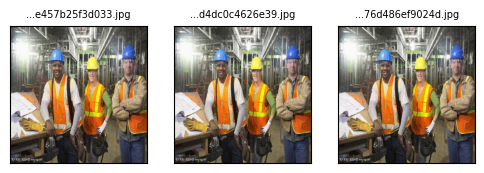

Set: 1


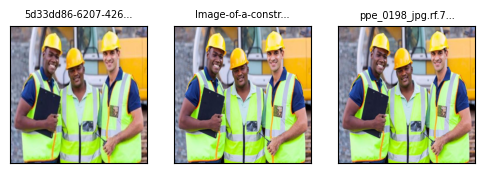

Set: 2


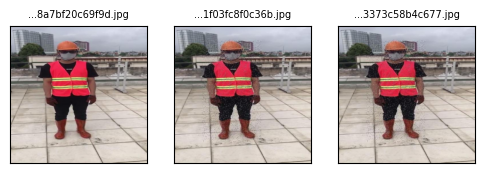

Set: 3


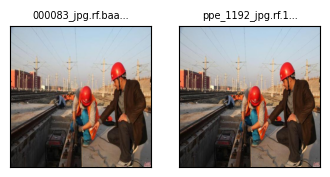

In [267]:
imagelab = Imagelab(data_path=IMAGES_DIR)
imagelab.find_issues()
imagelab.report()

In [268]:
imagelab.issues

odd_size_score  \
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
...                                                            ...   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...             1.0   

                                                    is_odd_size_issue  \
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
...                                                               ...   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...              False   

                                                    odd_aspect_ratio_score  \
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
...                                                                    ...   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                     1.0   

                                                    is_odd_aspect_ratio_issue  \
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
...                                                                       ...   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...                      False   

                                                    low_information_score  \
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...               0.934886   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...               0.922528   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...               0.902081   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-i...               0.931083   
C:/Users/Enzo/Desktop/mcs663/hw5/proyek

In [269]:
type(imagelab.issues)

pandas.core.frame.DataFrame

In [270]:
score_names = ['odd_size_score', 'odd_aspect_ratio_score', 'low_information_score', 'light_score', 'grayscale_score', 'dark_score', 'blurry_score',
               'exact_duplicates_score', 'near_duplicates_score']
for score_name in imagelab.issues:
    min_value = imagelab.issues[score_name].min()
    max_value = imagelab.issues[score_name].max()
    print(f'{score_name} min: {min_value} | max: {max_value}')

odd_size_score min: 1.0 | max: 1.0
is_odd_size_issue min: False | max: False
odd_aspect_ratio_score min: 1.0 | max: 1.0
is_odd_aspect_ratio_issue min: False | max: False
low_information_score min: 0.40370499905479584 | max: 0.9535980158103406
is_low_information_issue min: False | max: False
light_score min: 0.4063125352141026 | max: 1.0
is_light_issue min: False | max: False
grayscale_score min: 1 | max: 1
is_grayscale_issue min: False | max: False
dark_score min: 0.6144843430793212 | max: 1.0
is_dark_issue min: False | max: False
blurry_score min: 0.35958937372393895 | max: 1.0
is_blurry_issue min: False | max: False
exact_duplicates_score min: 1.0 | max: 1.0
is_exact_duplicates_issue min: False | max: False
near_duplicates_score min: 0.3333333333333333 | max: 1.0
is_near_duplicates_issue min: False | max: True


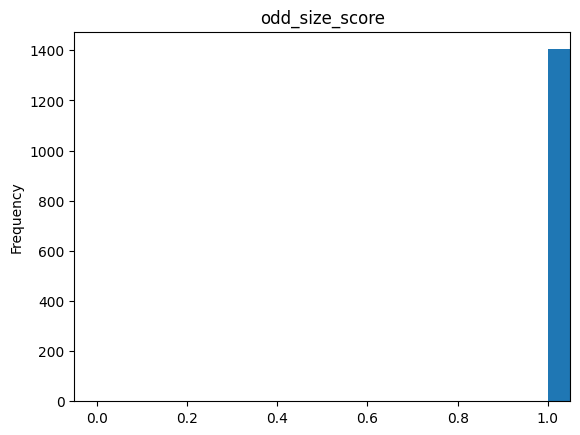

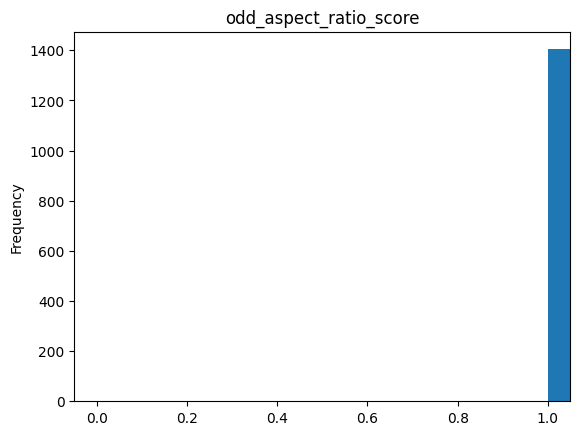

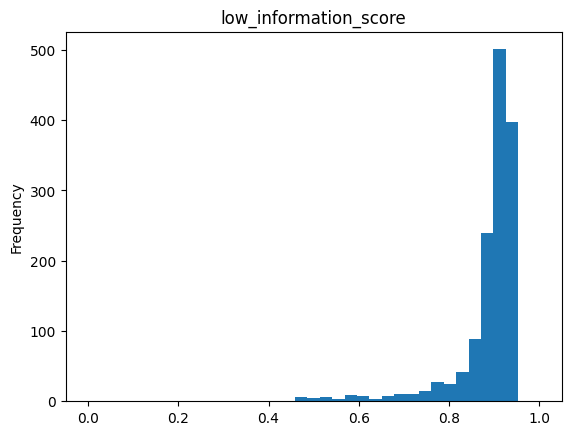

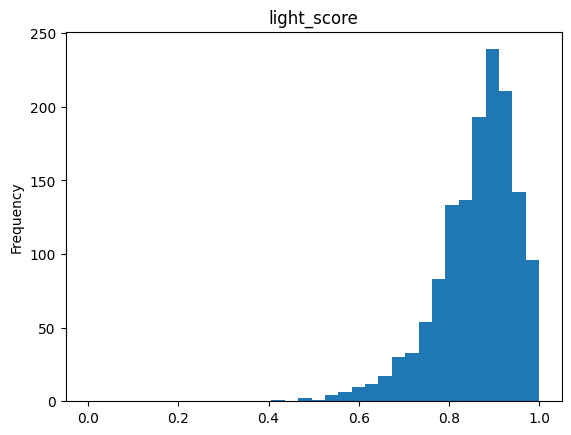

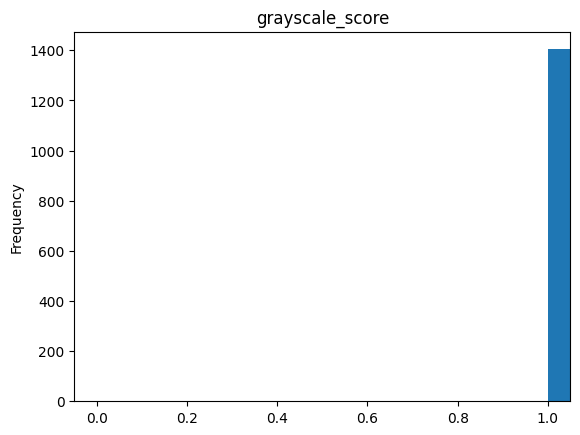

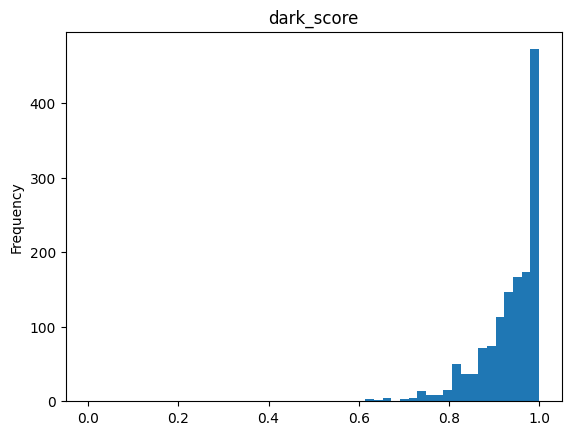

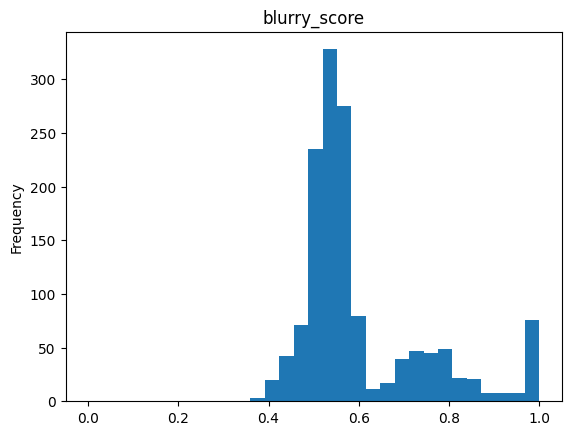

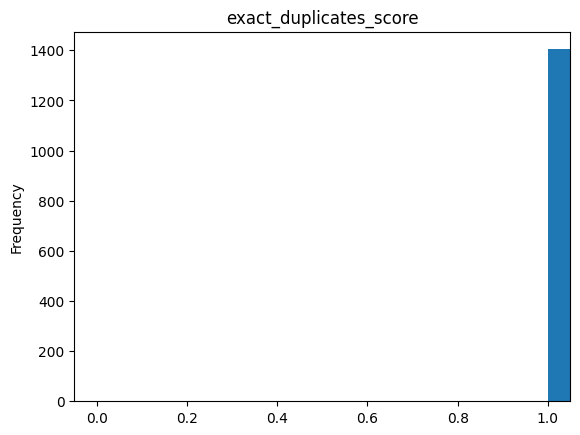

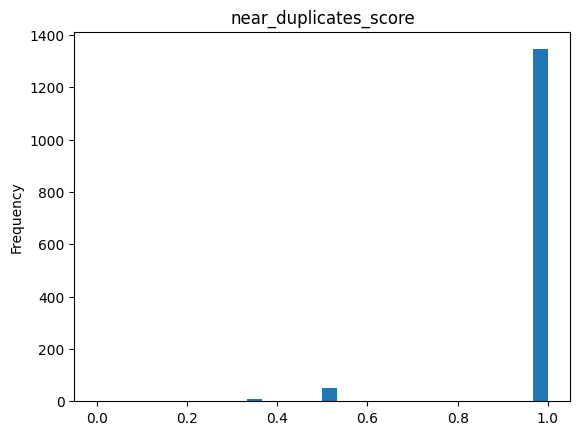

In [271]:
for score_name in score_names:
    #imagelab.issues[[score_name]].plot(kind='bar', figsize=(8, 5))
    imagelab.issues[score_name].plot.hist(bins=20)
    plt.title(score_name)
    plt.xlim(-0.05, 1.05)
    plt.show()

In [272]:
imagelab.list_default_issue_types()

['dark',
 'light',
 'odd_aspect_ratio',
 'low_information',
 'exact_duplicates',
 'near_duplicates',
 'blurry',
 'grayscale',
 'odd_size']

## Image Quality Analysis with score thresholds applied

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1404 [00:00<?, ?it/s]

  0%|          | 0/1404 [00:00<?, ?it/s]

Issue checks completed. 208 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | low_information  |          119 |
|  1 | near_duplicates  |           59 |
|  2 | light            |           20 |
|  3 | blurry           |           10 |
|  4 | dark             |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | odd_size         |            0 |
|  7 | grayscale        |            0 |
|  8 | exact_duplicates |            0 | 

------------------ low_information images ------------------

Number of examples with this issue: 119
Examples representing most severe instances of this issue:



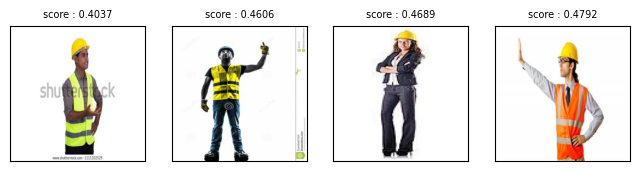

------------------ near_duplicates images ------------------

Number of examples with this issue: 59
Examples representing most severe instances of this issue:

Set: 0


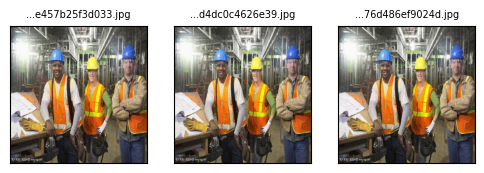

Set: 1


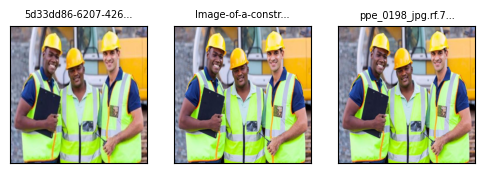

Set: 2


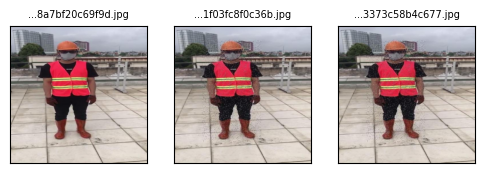

Set: 3


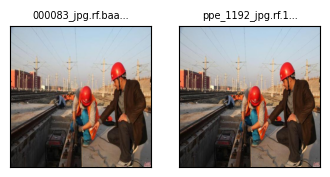

----------------------- light images -----------------------

Number of examples with this issue: 20
Examples representing most severe instances of this issue:



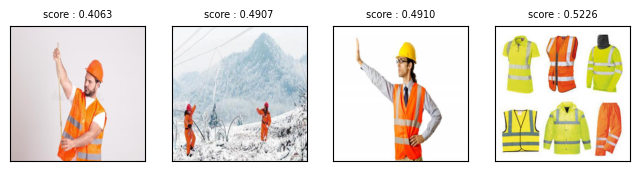

---------------------- blurry images -----------------------

Number of examples with this issue: 10
Examples representing most severe instances of this issue:



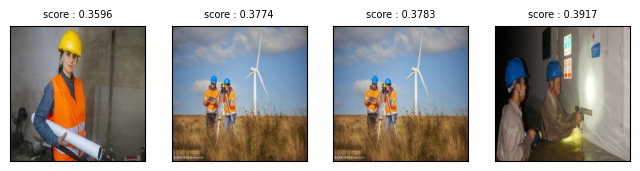

In [273]:
our_issue_types = {
    "dark": { "threshold": 0.6 },
    "light": { "threshold": 0.6 },
    "odd_aspect_ratio": { "threshold": 0.8 },
    "low_information": { "threshold": 0.8 },
    "exact_duplicates": { "threshold": 0.8 },
    "near_duplicates": { "threshold": 0.8 },
    "blurry": { "threshold": 0.4 },
    "odd_size": { "threshold": 0.8 },
    "grayscale": { "threshold": 0.8 }
}
imagelab = Imagelab(data_path=IMAGES_DIR)
imagelab.find_issues(our_issue_types)
imagelab.report()

## Improvement: removal of duplicates and low information images

In [274]:
# reference: https://github.com/cleanlab/cleanvision/discussions/245#discussioncomment-7976383
from itertools import chain
exact_duplicates_images = list(chain(*[ set[1:] for set in imagelab.info['exact_duplicates']['sets'] ]))

low_information_images = (imagelab.issues[imagelab.issues['is_low_information_issue'] == True]
                             .reset_index()[['index']]
                              .values)

# Group near duplicates into sets
near_duplicates_image_sets = imagelab.info['near_duplicates']['sets']

# Get blurry score of each near duplicate image
near_duplicates_image_scores = (imagelab.issues[imagelab.issues['is_near_duplicates_issue'] == True]
                                    .sort_values(by='blurry_score')
                                    .reset_index()[['index', 'blurry_score']]
                                    .values.tolist())

near_duplicates_images = []

# Create a new set list by comparing
# near_duplicates_image_sets and near_duplicates_image_scores
# and removing the image with the highest blurr score (less blurry, highest quality?)
# from each set
for set in near_duplicates_image_sets:
    max_score_entry = max((entry for entry in near_duplicates_image_scores if entry[0] in set), key=lambda x: x[1])
    updated_set_list = [img for img in set if img != max_score_entry[0]]
    near_duplicates_images.append(updated_set_list)

# Flatten the set list 
# e.g. convert list of lists into one big list
# so it is easily iterable
exact_duplicates_images = list(chain.from_iterable(exact_duplicates_images))
low_information_images = list(chain.from_iterable(low_information_images))
near_duplicates_images = list(chain.from_iterable(near_duplicates_images))

excluded_images = exact_duplicates_images + low_information_images + near_duplicates_images

In [275]:
print(f'Exact sets: {len(imagelab.info['exact_duplicates']['sets'])} | Near sets: {len(imagelab.info['near_duplicates']['sets'])}')
print(f'Exact: {len(exact_duplicates_images)} | Near: {len(near_duplicates_images)} | Low info: {len(low_information_images)}')
print(f'Total: {len(excluded_images)}')

Exact sets: 0 | Near sets: 28
Exact: 0 | Near: 31 | Low info: 119
Total: 150


In [276]:
included_images = list(entry for entry in imagelab.issues.index.to_list() if entry not in excluded_images)
len(included_images)

1254

In [277]:
import shutil, os
for f in included_images:
    shutil.copy(f, IMPROVED_IMAGES_DIR)

## Image Quality Analysis after image removal

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1254 [00:00<?, ?it/s]

  0%|          | 0/1254 [00:00<?, ?it/s]

Issue checks completed. 15 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            9 |
|  1 | light            |            6 |
|  2 | dark             |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | odd_size         |            0 |
|  6 | grayscale        |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 9
Examples representing most severe instances of this issue:



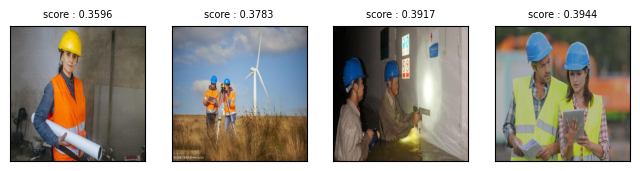

----------------------- light images -----------------------

Number of examples with this issue: 6
Examples representing most severe instances of this issue:



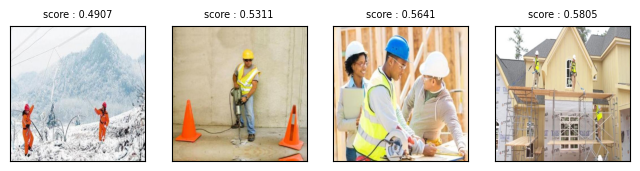

In [278]:
imagelab_improved = Imagelab(data_path=IMPROVED_IMAGES_DIR)
imagelab_improved.find_issues(our_issue_types)
imagelab_improved.report()

## Improvement: adjusting light and dark images using CLAHE

Processing 'light' images:
['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/000088_jpg.rf.2cf88734b67f7180ad1a6b6d679a8174.jpg'
 0.4907207647237214]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/000088_jpg.rf.2cf88734b67f7180ad1a6b6d679a8174.jpg | initial score: 0.4907207647237214


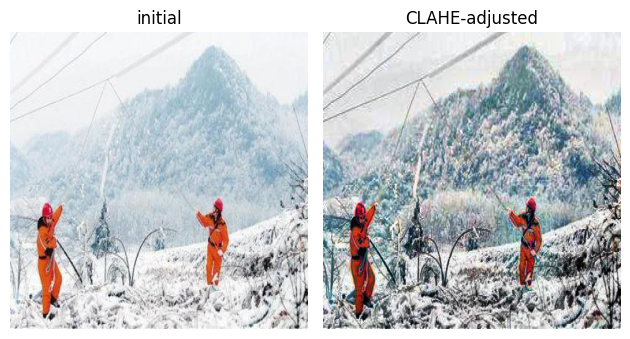

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/000215_jpg.rf.1c031620912a14f35ff2210cce9ae7a2.jpg'
 0.5954175786795242]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/000215_jpg.rf.1c031620912a14f35ff2210cce9ae7a2.jpg | initial score: 0.5954175786795242


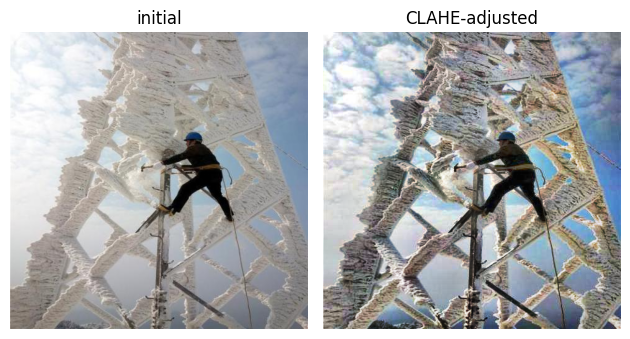

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/hard_hat_workers4394_png.rf.2b71de5b84a996e892d235faa8c05c76.jpg'
 0.531074290637156]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/hard_hat_workers4394_png.rf.2b71de5b84a996e892d235faa8c05c76.jpg | initial score: 0.531074290637156


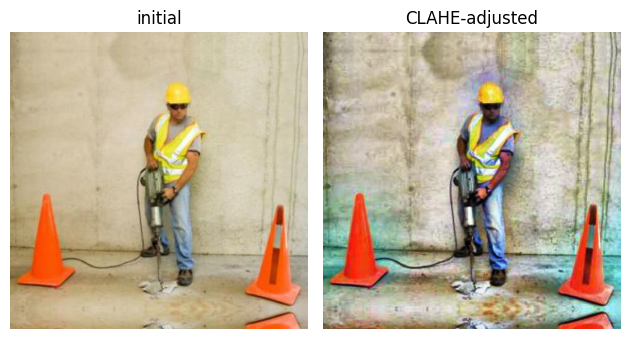

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/ppe_0259_jpg.rf.cc2064e547fe684b66854091e7c77886.jpg'
 0.5640781173933787]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/ppe_0259_jpg.rf.cc2064e547fe684b66854091e7c77886.jpg | initial score: 0.5640781173933787


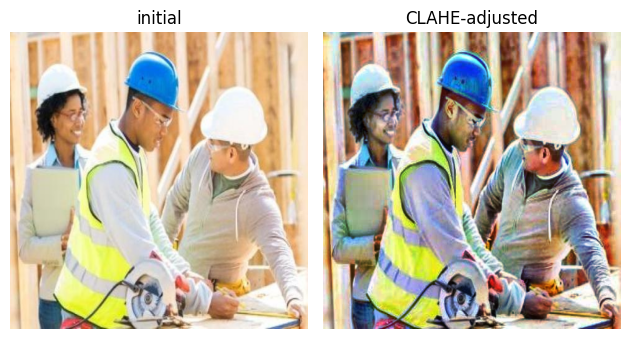

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/two-young-construction-workers-wearing-555864_jpg.rf.8a83b5b59659f7112faf25c258f9828c.jpg'
 0.5971473357278831]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/two-young-construction-workers-wearing-555864_jpg.rf.8a83b5b59659f7112faf25c258f9828c.jpg | initial score: 0.5971473357278831


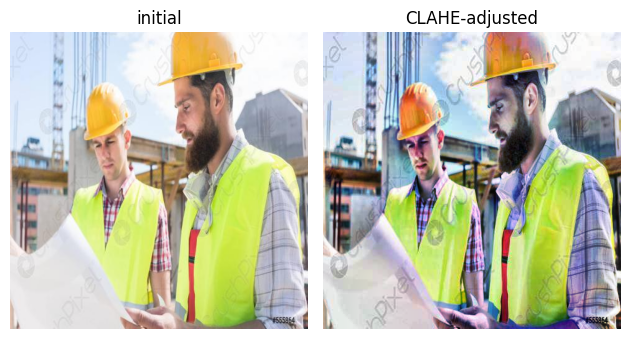

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/youtube-492_jpg.rf.87bab6f39c533498da947a9b0b97c640.jpg'
 0.580543513858188]
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/youtube-492_jpg.rf.87bab6f39c533498da947a9b0b97c640.jpg | initial score: 0.580543513858188


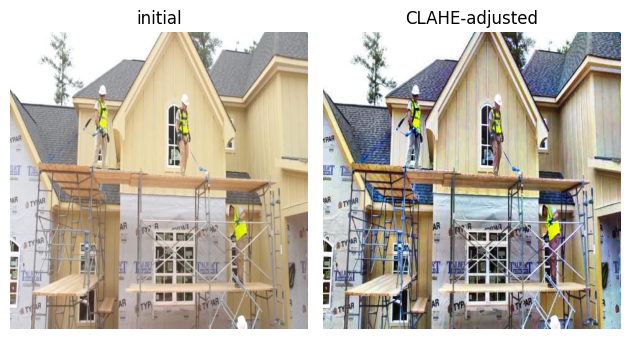

In [279]:
# reference: https://www.freedomvc.com/index.php/2021/09/19/color-image-histogram-clahe/
import cv2
import numpy as np

# Initialize CLAHE model
clahe_model = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

def show_image(img, img_title=''):
    if img.ndim > 2:
        img = img.copy()[:,:,::-1]
    plt.imshow(img)
    plt.title(img_title)
    plt.axis('off')
    plt.show()

def show_image_pair(img1, img1_title='', img2=None, img2_title=''):
    if img1.ndim > 2:
        img1 = img1.copy()[:,:,::-1]
    if img2.ndim > 2:
        img2 = img2.copy()[:,:,::-1]
        
    fig, axs = plt.subplots(1, 2)
    
    axs[0].imshow(img1)
    axs[0].set_title(img1_title)
    axs[0].axis('off')
    
    axs[1].imshow(img2)
    axs[1].set_title(img2_title)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

def process_image_lighting(images_list):
    for img_entry in images_list:
        print(img_entry)
        img_path = img_entry[0]
        img_initial_score = img_entry[1]
        print(f'path: {img_path} | initial score: {img_initial_score}')
    
        img = cv2.imread(img_path)
    
        # Process each color channel individually
        channel_b = clahe_model.apply(img[:,:,0])
        channel_g = clahe_model.apply(img[:,:,1])
        channel_r = clahe_model.apply(img[:,:,2])
    
        # Combine all channels into one image
        img_clahe = np.stack((channel_b, channel_g, channel_r), axis=2)
    
        show_image_pair(img, 'initial', img_clahe, 'CLAHE-adjusted')
        
        cv2.imwrite(img_path, img_clahe, [cv2.IMWRITE_JPEG_QUALITY, 100])


light_images = (imagelab_improved.issues[imagelab_improved.issues['is_light_issue'] == True]
                            .reset_index()[['index', 'light_score']]
                            .values)
if len(light_images) > 0:
    print('Processing \'light\' images:')
    process_image_lighting(light_images)

dark_images = (imagelab_improved.issues[imagelab_improved.issues['is_dark_issue'] == True]
                            .reset_index()[['index', 'dark_score']]
                            .values)
if len(dark_images) > 0:
    print('Processing \'dark\' images:')
    process_image_lighting(dark_images)



## Image Quality Assessment after lighting adjustment

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1254 [00:00<?, ?it/s]

  0%|          | 0/1254 [00:00<?, ?it/s]

Issue checks completed. 9 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            9 |
|  1 | dark             |            0 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | odd_size         |            0 |
|  6 | grayscale        |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 9
Examples representing most severe instances of this issue:



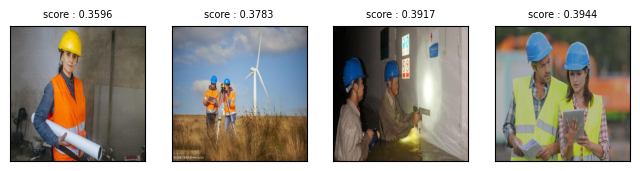

In [280]:
imagelab_improved = Imagelab(data_path=IMPROVED_IMAGES_DIR)
imagelab_improved.find_issues(our_issue_types)
imagelab_improved.report()

## Improvement: sharpening of blurry images using sharpening kernel

Processing 'blurry' images:
path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/-2023-05-16-041610_jpg.rf.744c3959a32a74ee9ece19cb8cf43ee6.jpg | initial score: 0.3981416668339184


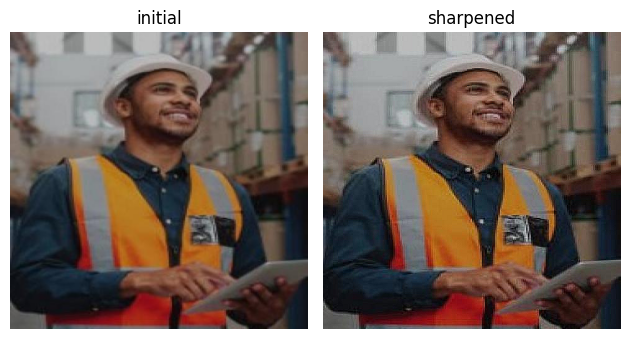

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/-2023-05-16-041836_jpg.rf.7990c42417fc6e7be564420ac76c0dda.jpg | initial score: 0.39843119357707246


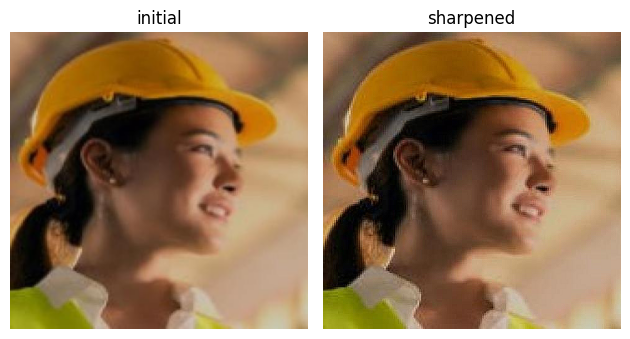

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/000189_jpg.rf.73024dba970b3d1d5b6bf64d5ee1ecf8.jpg | initial score: 0.39168099789834265


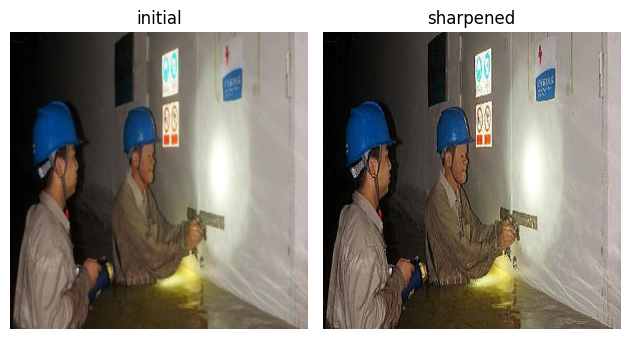

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/01094_jpg.rf.20d7bfeccbed710a36529f01cb54c093.jpg | initial score: 0.3782911982392084


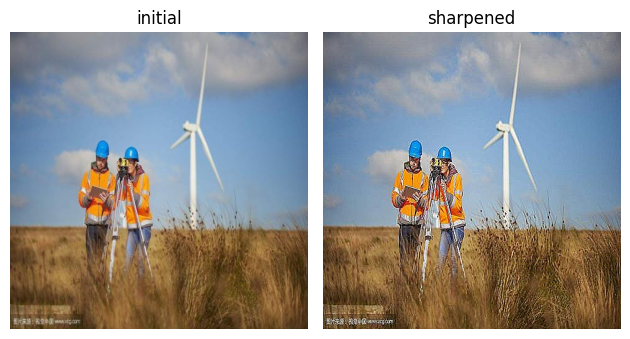

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/Image-of-a-construction-worker-wearing-a-helmet-and-a-vest_34_jpeg.rf.7421b56c9321f3c3cc47ce814e56ce96.jpg | initial score: 0.35958937372393895


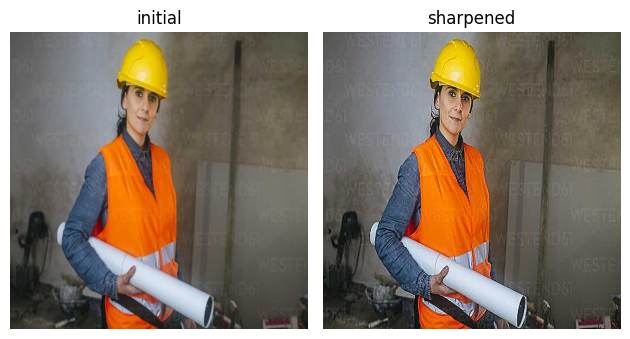

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/ppe_0366_jpg.rf.0d854a72aad9cfc0b8b423347cc5d497.jpg | initial score: 0.39819480037029353


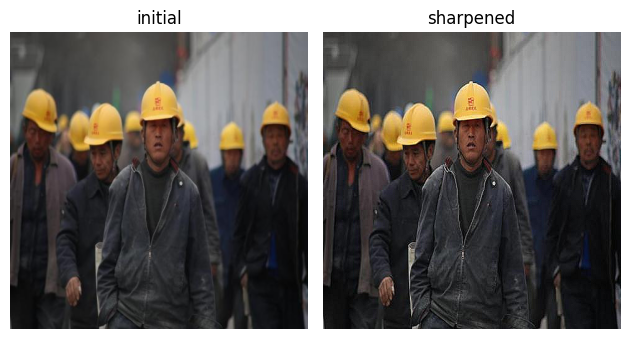

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/ppe_0703_jpg.rf.e7886030d01ef9aef14e8e9a0f14bc63.jpg | initial score: 0.39437344703545063


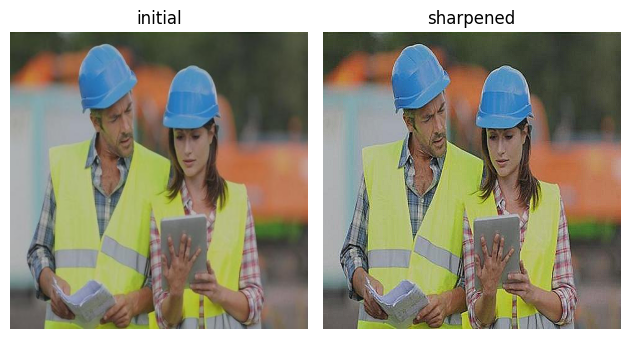

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/youtube-568_jpg.rf.a3a3683f2664b0f7903199723710e511.jpg | initial score: 0.3957778979114106


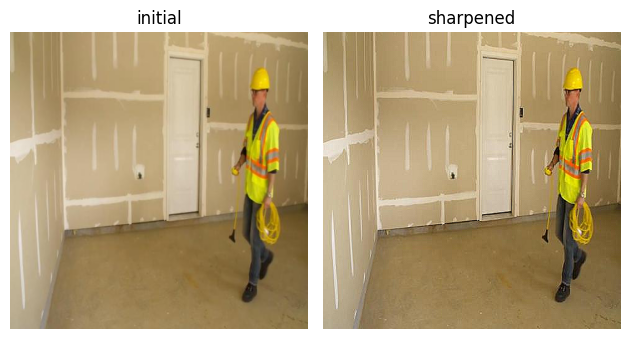

path: C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved/youtube-589_jpg.rf.ac1536526669a1f0c28f69c132d78316.jpg | initial score: 0.3984749415036559


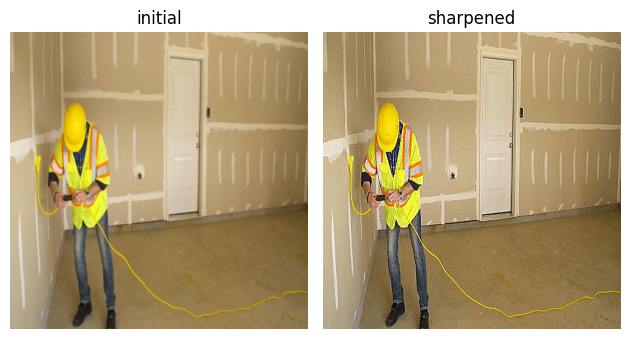

In [281]:
# reference: https://www.geeksforgeeks.org/machine-learning/image-enhancement-techniques-using-opencv-python/

# Initialize sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

blurry_images = (imagelab_improved.issues[imagelab_improved.issues['is_blurry_issue'] == True]
                            .reset_index()[['index', 'blurry_score']]
                            .values)
print('Processing \'blurry\' images:')
for img_entry in blurry_images:
    img_path = img_entry[0]
    img_initial_score = img_entry[1]
    print(f'path: {img_path} | initial score: {img_initial_score}')

    img = cv2.imread(img_path)

    # Apply sharpening kernel to image
    img_sharp = cv2.filter2D(img, -1, kernel)

    show_image_pair(img, 'initial', img_sharp, 'sharpened')
    
    cv2.imwrite(img_path, img_sharp, [cv2.IMWRITE_JPEG_QUALITY, 100])

## Image Quality Assessment after image sharpening

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1254 [00:00<?, ?it/s]

  0%|          | 0/1254 [00:00<?, ?it/s]

Issue checks completed. 2 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            2 |
|  1 | dark             |            0 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | odd_size         |            0 |
|  6 | grayscale        |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



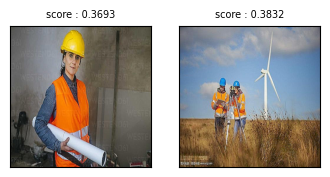

In [282]:
imagelab_improved = Imagelab(data_path=IMPROVED_IMAGES_DIR)
imagelab_improved.find_issues(our_issue_types)
imagelab_improved.report()